In [105]:
from getData import get_data, get_ohlcv
from technical_indicator import LR, MACD, RSI, BB, ATR, ADX, RENKO
from Returns import cummulative_returns, CAGR, volatility, SHARPE, SORTINO, MAXDROWDOWN, CALMAR

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import copy
%load_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
tickers = ['RELIANCE.NS'
,
           
           'TCS.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS', 'INFY.NS', 'SBIN.NS', 'HINDUNILVR.NS', 
           'BAJFINANCE.NS',
           'ITC.NS']
# '^NSEI', 

In [107]:
# Store data in dictionary
ohlcv_dict = {}
for stock in tickers:
    ohlcv_dict[stock] = get_ohlcv(ticker=stock, period = '1mo', interval='5m', multi_level_index=False)
    ohlcv_dict[stock] = ohlcv_dict[stock].between_time('09:35', '16:00')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [108]:
data = copy.deepcopy(ohlcv_dict)

In [109]:
# Calculating ATR Roll max Roll min and Roll max for volumn

tickers_signal = {}
tickers_ret = {}

for stock in tickers:
    data[stock]['ATR'] = ATR(data[stock], 20)
    data[stock]['RSI'] = RSI(data[stock], 14)
    data[stock][['MB','UB','LB','STD','WIDTH']] = BB(data[stock], 14)
    data[stock]['roll_max_cp'] = data[stock]['High'].rolling(20).max()
    data[stock]['roll_min_cp'] = data[stock]['Low'].rolling(20).min()
    data[stock]['roll_max_vol'] = data[stock]['Volume'].rolling(20).max()
    data[stock].dropna(inplace = True)
    data[stock]['Signal'] = 0
    tickers_signal[stock] = ''
    tickers_ret[stock] = [0]

In [111]:
# df = data['RELIANCE.NS'].copy()
# df
stock = 'RELIANCE.NS'
np.where(data['RELIANCE.NS']['RSI'] < 20),
# np.where((data[stock]['Close']<= data[stock]['LB']), 1, 0)
# np.where((data[stock]['Close'].values <= data[stock]['LB'].values), 1,0)
np.where((data[stock]['Close'] <= data[stock]['LB']), 1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
# i = 10
# data['RELIANCE.NS']['UB'].iloc[i], 

# stock = 'RELIANCE.NS'

# print(data[stock]['RSI'].iloc[i]), 
# print(data[stock]['Volume'].iloc[i].values[0]), 
# print(data[stock]['roll_max_vol'].iloc[i-1]),
# print(data[stock]['Close'].iloc[i-1].values[0]), 
# print(data[stock]['UB'].iloc[i])

In [80]:
# Identifying signal and calculating return RSI + BB + ATR
for stock in tickers:
    print(f"Calculating Returns for {stock}")

    for i in range(1, len(data[stock])):
        if tickers_signal[stock] == "":
            tickers_ret[stock].append(0)
            if (data[stock]['RSI'].iloc[i] <= 20 & 
                # (data[stock]['Volume'].iloc[i].values[0] > 1.5 * data[stock]['roll_max_vol'].iloc[i-1]) & 
                (data[stock]['Close'].iloc[i-1].values[0]<= data[stock]['LB'].iloc[i])):
                # tickers_signal[stock] = "Buy"
                data[stock][Signal].iloc[i] = 1
                
            elif (data[stock]['RSI'].iloc[i] >= 80 & 
                # (data[stock]['Volume'].iloc[i].values[0] > 1.5 * data[stock]['roll_max_vol'].iloc[i-1]) & 
                (data[stock]['Close'].iloc[i-1].values[0]>= data[stock]['UB'].iloc[i])):          
                # tickers_signal[stock] = "Sell"
                data[stock]['Signal'].iloc[i] = -1
                

    #     elif tickers_signal[stock] == "Buy":
    #         if (data[stock]['Close'].iloc[i].values[0] > data[stock]['MB'].iloc[i-1].values[0]):
    #             tickers_signal[stock] == ""
    #             tickers_ret[stock].append(((data[stock]["MB"].iloc[i-1].values[0] - 
    #                                       data[stock]["ATR"].iloc[i-1])/data[stock]["Close"].iloc[i-1].values[0])-1)
    #         else:
    #             tickers_ret[stock].append((data[stock]["Close"].iloc[i].values[0]/data[stock]["Close"].iloc[i-1].values[0])-1)
                
    #     elif tickers_signal[stock] == "Sell":
    #         if (data[stock]['High'].iloc[i].values[0] > (data[stock]['Close'].iloc[i-1].values[0] + data[stock]['ATR'].iloc[i-1])):
    #             tickers_signal == ""
    #             tickers_ret[stock].append(((data[stock]["Close"].iloc[i-1].values[0]/
    #                                       data[stock]["ATR"].iloc[i-1]) +data[stock]["Close"].iloc[i-1].values[0])-1)
    #         else:
    #             tickers_ret[stock].append((data[stock]["Close"].iloc[i-1].values[0]/data[stock]["Close"].iloc[i].values[0])-1)
    # data[stock]["ret"] = np.asarray(tickers_ret[stock], dtype="object")

Calculating Returns for RELIANCE.NS
Calculating Returns for TCS.NS
Calculating Returns for HDFCBANK.NS
Calculating Returns for BHARTIARTL.NS
Calculating Returns for ICICIBANK.NS
Calculating Returns for INFY.NS
Calculating Returns for SBIN.NS
Calculating Returns for HINDUNILVR.NS
Calculating Returns for BAJFINANCE.NS
Calculating Returns for ITC.NS


In [81]:
np.where([data['RELIANCE.NS']['Signal'] == 1])

(array([], dtype=int64), array([], dtype=int64))

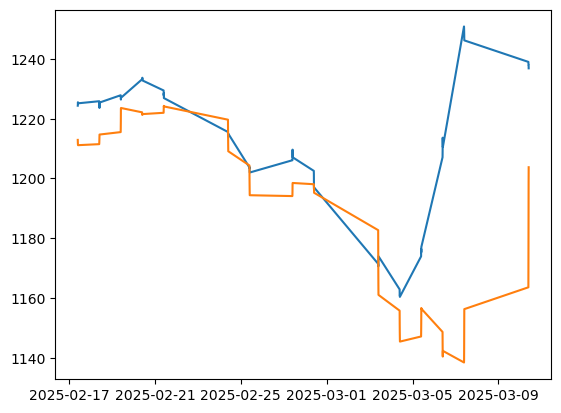

In [101]:
plt.plot(data['RELIANCE.NS']['Close'])
plt.plot(data['RELIANCE.NS']['LB'])


In [431]:
# Identifying signal and calculating return

for stock in tickers:
    print(f"Calculating Returns for {stock}")

    for i in range(1, len(data[stock])):
        # print(data[stock].iloc[i])
        if tickers_signal[stock] == "":
            tickers_ret[stock].append(0)
            if (data[stock]['High'].iloc[i].values[0] >= data[stock]['roll_max_cp'].iloc[i]) & (data[stock]['Volume'].iloc[i].values[0] > 1.5 * data[stock]['roll_max_vol'].iloc[i-1]):
                # print("Condition met")
                tickers_signal[stock] = "Buy"
            elif (data[stock]['Low'].iloc[i].values[0] <= data[stock]['roll_min_cp'].iloc[i]) & (data[stock]['Volume'].iloc[i].values[0] > 1.5 * data[stock]['roll_max_vol'].iloc[i-1]):
                # print("Condition met")
                tickers_signal[stock] = "Sell"


        elif tickers_signal[stock] == "Buy":
            if (data[stock]['Low'].iloc[i].values[0] >= data[stock]['Close'].iloc[i-1].values[0] - data[stock]['ATR'].iloc[i-1]):
                tickers_signal[stock] == ""
                tickers_ret[stock].append(((data[stock]["Close"].iloc[i-1].values[0] - 
                                          data[stock]["ATR"].iloc[i-1])/data[stock]["Close"].iloc[i-1].values[0])-1)
            else:
                tickers_ret[stock].append((data[stock]["Close"].iloc[i].values[0]/data[stock]["Close"].iloc[i-1].values[0])-1)
                
        elif tickers_signal[stock] == "Sell":
            if (data[stock]['High'].iloc[i].values[0] > (data[stock]['Close'].iloc[i-1].values[0] + data[stock]['ATR'].iloc[i-1])):
                tickers_signal == ""
                tickers_ret[stock].append(((data[stock]["Close"].iloc[i-1].values[0]/
                                          data[stock]["ATR"].iloc[i-1]) +data[stock]["Close"].iloc[i-1].values[0])-1)
            else:
                tickers_ret[stock].append((data[stock]["Close"].iloc[i-1].values[0]/data[stock]["Close"].iloc[i].values[0])-1)
    data[stock]["ret"] = np.asarray(tickers_ret[stock], dtype="object")

Calculating Returns for RELIANCE.NS
Calculating Returns for TCS.NS
Calculating Returns for HDFCBANK.NS
Calculating Returns for BHARTIARTL.NS
Calculating Returns for ICICIBANK.NS
Calculating Returns for INFY.NS
Calculating Returns for SBIN.NS
Calculating Returns for HINDUNILVR.NS
Calculating Returns for BAJFINANCE.NS
Calculating Returns for ITC.NS


In [432]:
# Overall KPI 

strategy_df = pd.DataFrame()

for stock in tickers:
    strategy_df[stock] = data[stock]['ret']
strategy_df['ret'] = strategy_df.mean(axis = 1)

In [433]:
# vizualization of strategy return
# (1+strategy_df["ret"]).cumprod().plot()
(strategy_df['RELIANCE.NS'])

Datetime
2025-02-03 09:55:00+00:00           0
2025-02-04 09:35:00+00:00           0
2025-02-04 09:40:00+00:00           0
2025-02-04 09:45:00+00:00           0
2025-02-04 09:50:00+00:00           0
                               ...   
2025-02-28 09:35:00+00:00    0.004948
2025-02-28 09:40:00+00:00    0.000916
2025-02-28 09:45:00+00:00     0.00334
2025-02-28 09:50:00+00:00    0.000961
2025-02-28 09:55:00+00:00   -0.000585
Name: RELIANCE.NS, Length: 91, dtype: object

<Axes: xlabel='Datetime'>

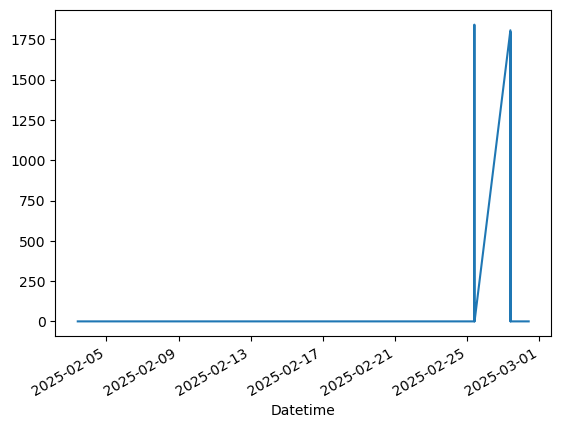

In [436]:
strategy_df['RELIANCE.NS'].plot()